# Лабораторная работа 2

> =========================================
>
> Тема: Классификация, оченка точности классификации
>
> Набор данных: Рак
>
> Студент: Шацкий Никита ИУ7-21М
> 
>=========================================

## 0. Импорты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

## 1. Данные

### 1.1. Чтение

In [46]:
pd.set_option('display.max_columns', None)

dfInit = pd.read_csv('./data/cancers.csv', delimiter=';', encoding='utf8')


df = dfInit.copy(deep=True)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,14154.00,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,15646.00,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,45438.00,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,45408.00,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,45459.00,45532.00,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,45463.00,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.2. Преобразование

In [47]:
def updateData(fieldName):
  dataDf = list(set(df[fieldName].map(lambda elem: elem)))

  cnt = 0
  dataDict = {}
  for shape in dataDf:
    if shape not in dataDict.keys():
      dataDict[shape] = cnt
      cnt += 1
  print(f"{fieldName} = {dataDict}\n")

  df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [48]:
del df["id"]
df.dropna(axis=0, inplace=True)
updateData(fieldName="diagnosis")
updateData(fieldName="radius_mean")
updateData(fieldName="texture_mean")
updateData(fieldName="perimeter_mean")
updateData(fieldName="area_mean")
updateData(fieldName="smoothness_mean")
updateData(fieldName="compactness_mean")
updateData(fieldName="concavity_mean")
updateData(fieldName="concave points_mean")
updateData(fieldName="symmetry_mean")
updateData(fieldName="fractal_dimension_mean")
updateData(fieldName="radius_se")
updateData(fieldName="texture_se")
updateData(fieldName="perimeter_se")
updateData(fieldName="area_se")
updateData(fieldName="smoothness_se")
updateData(fieldName="compactness_se")
updateData(fieldName="concavity_se")
updateData(fieldName="concave points_se")
updateData(fieldName="symmetry_se")
updateData(fieldName="fractal_dimension_se")
updateData(fieldName="radius_worst")
updateData(fieldName="texture_worst")
updateData(fieldName="perimeter_worst")
updateData(fieldName="area_worst")
updateData(fieldName="smoothness_worst")
updateData(fieldName="compactness_worst")
updateData(fieldName="concavity_worst")
updateData(fieldName="concave points_worst")
updateData(fieldName="symmetry_worst")
updateData(fieldName="fractal_dimension_worst")

df


diagnosis = {'B': 0, 'M': 1}

radius_mean = {43009.0: 0, 6.981: 1, 7.729: 2, 8.196: 3, 9.504: 4, 8.618: 5, 8.598: 6, 8.888: 7, 13.34: 8, 13.53: 9, 13.73: 10, 14.54: 11, 14.68: 12, 13.71: 13, 13.0: 14, 15.78: 15, 15.85: 16, 17.99: 17, 18.25: 18, 19.69: 19, 20.57: 20, 20.29: 21, 19.17: 22, 19.81: 23, 21.16: 24, 25.22: 25, 22.27: 26, 24.25: 27, 27.22: 28, 25.73: 29, 27.42: 30, 32813.0: 31, 9.738: 32, 9.0: 33, 9.268: 34, 22586.0: 35, 12.0: 36, 13.75: 37, 14.25: 38, 12359.0: 39, 32843.0: 40, 15.75: 41, 15.0: 42, 16.78: 43, 16.25: 44, 17.47: 45, 17.75: 46, 18.22: 47, 34912.0: 48, 19.0: 49, 19.53: 50, 20.47: 51, 21.75: 52, 28825.0: 53, 34973.0: 54, 8.726: 55, 8.571: 56, 9.333: 57, 35004.0: 58, 13.44: 59, 13.69: 60, 13.47: 61, 13.94: 62, 14.44: 63, 14.97: 64, 14.22: 65, 14.19: 66, 14.69: 67, 15.19: 68, 45261.0: 69, 24777.0: 70, 14.47: 71, 15.22: 72, 35034.0: 73, 24807.0: 74, 14580.0: 75, 45303.0: 76, 45304.0: 77, 45306.0: 78, 45308.0: 79, 45309.0: 80, 45310.0: 81, 45312.0: 82, 45313.0: 83, 309

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17,423,508,447,328,239,252,0,325,455,145,269,8,131,520,141,89,208,0,206,18,3,129,541,259,261,0,221,166,0
1,1,20,4,91,509,456,515,19,500,201,239,65,398,267,68,385,274,433,79,15,84,17,10,106,536,340,87,516,27,313,209
2,1,19,9,89,482,284,305,523,341,393,8,272,162,4,88,78,270,175,101,12,342,16,11,103,516,370,457,170,317,35,8
3,1,301,7,29,104,432,506,253,26,188,142,185,144,268,23,182,482,507,388,314,478,7,162,45,201,205,63,204,342,381,501
4,1,21,1,93,502,86,261,315,372,63,278,464,65,5,89,403,527,240,217,214,5,15,2,101,495,217,473,329,210,167,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,419,315,325,518,123,78,6,266,400,372,98,397,507,137,24,135,318,502,409,482,251,145,367,543,59,201,400,238,272,378
565,1,133,60,313,495,308,183,457,173,417,187,13,124,491,439,56,431,343,120,3,474,124,96,356,518,390,182,323,398,486,513
566,1,151,178,496,416,414,244,97,505,99,201,401,80,307,399,8,156,54,320,373,261,243,452,510,435,362,528,118,421,209,113
567,1,153,326,324,497,50,470,471,456,426,247,21,168,173,249,326,436,292,135,265,335,347,366,129,527,44,225,127,194,417,33


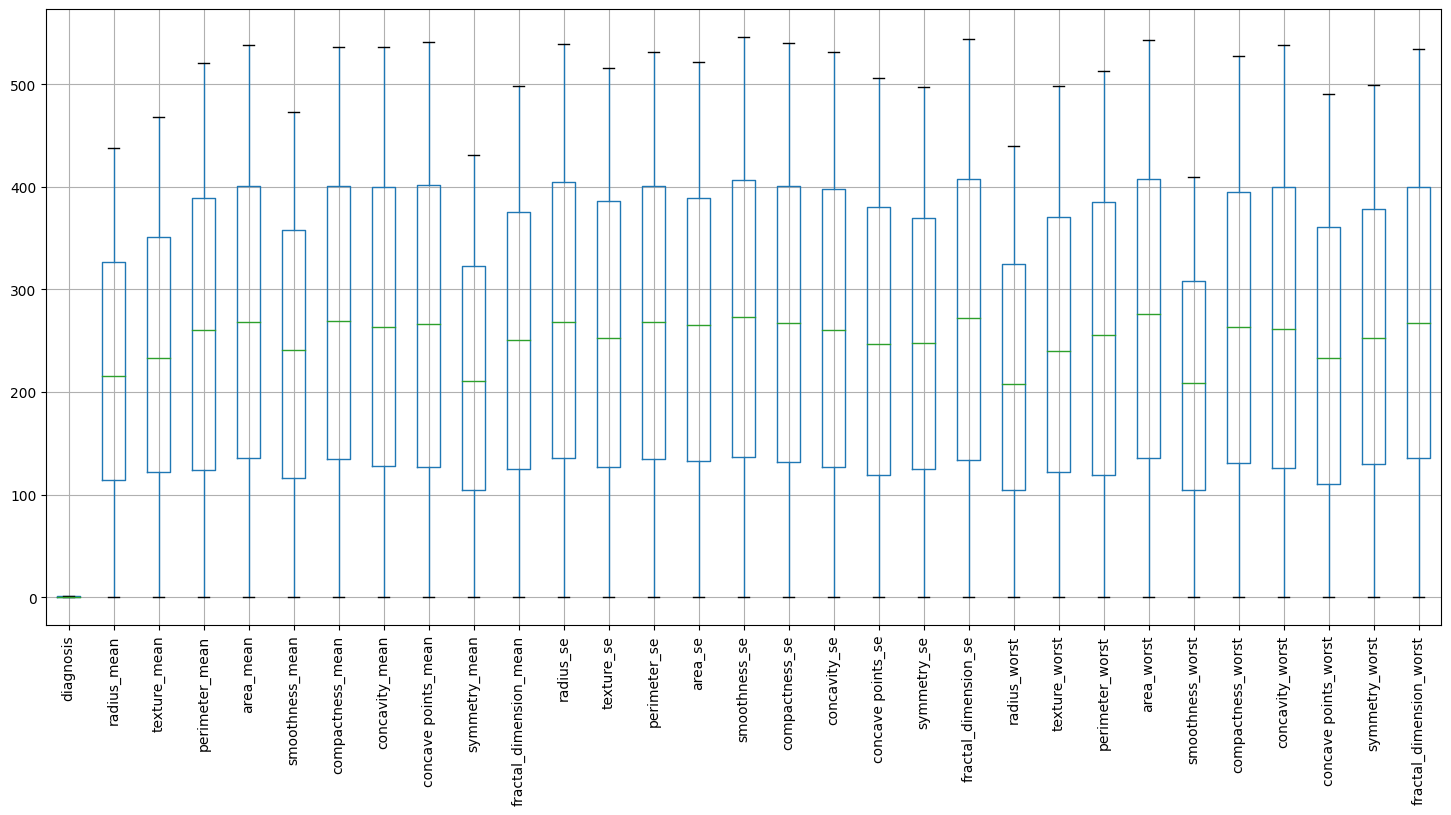

In [49]:
ax = df.boxplot(column=list(df.columns),figsize=(18,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax
plt.show()

## 2. Выполнение

### 2.1. Разделение данных

In [50]:
x = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

In [51]:
xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [52]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTraining = scaler.transform(xTraining)
xTest = scaler.transform(xTest)

In [53]:
labelEncoder = preprocessing.LabelEncoder()
yTrainingEncoded = labelEncoder.fit_transform(yTraining)

### 2.2. k-ближайших соседей

In [54]:
import warnings
warnings.filterwarnings("ignore") # убрать FutureWarning (возникает в KMeans функции)

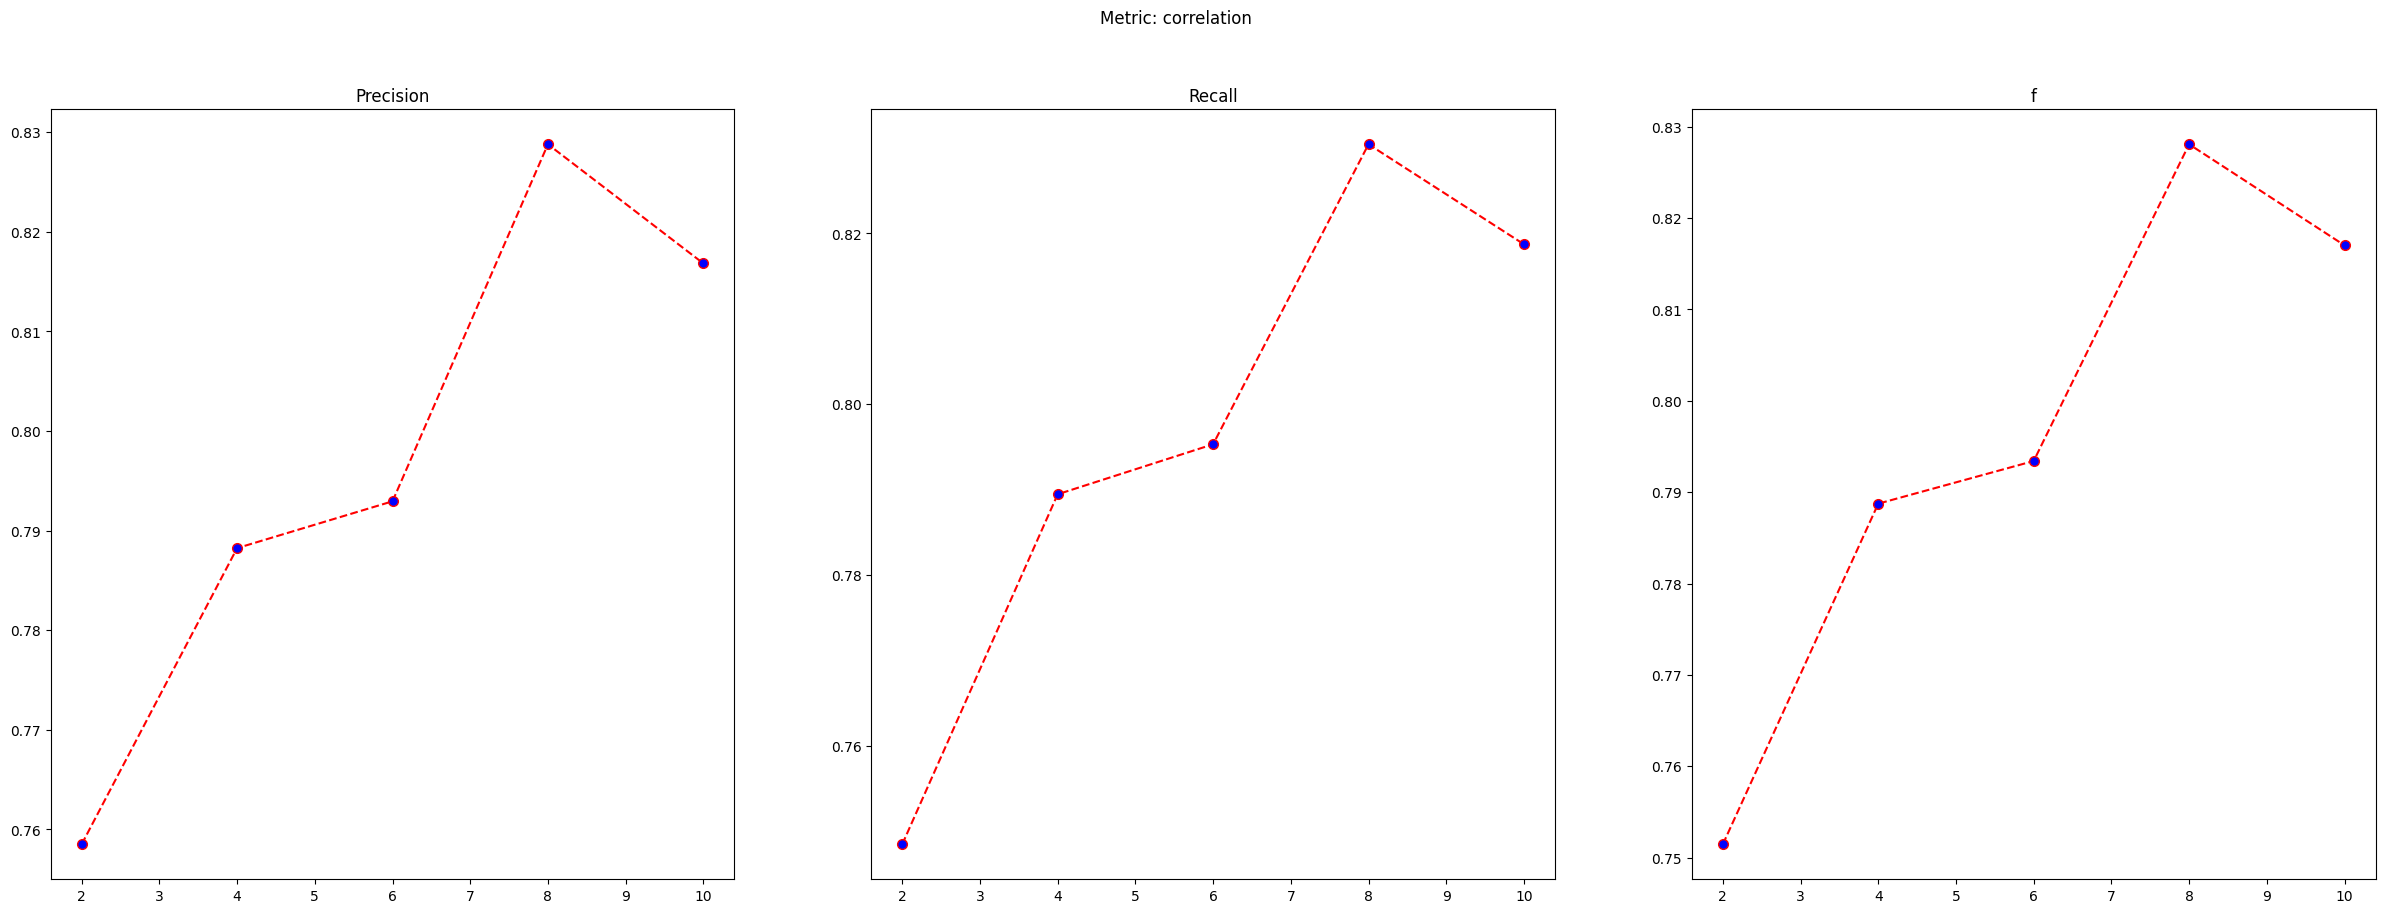

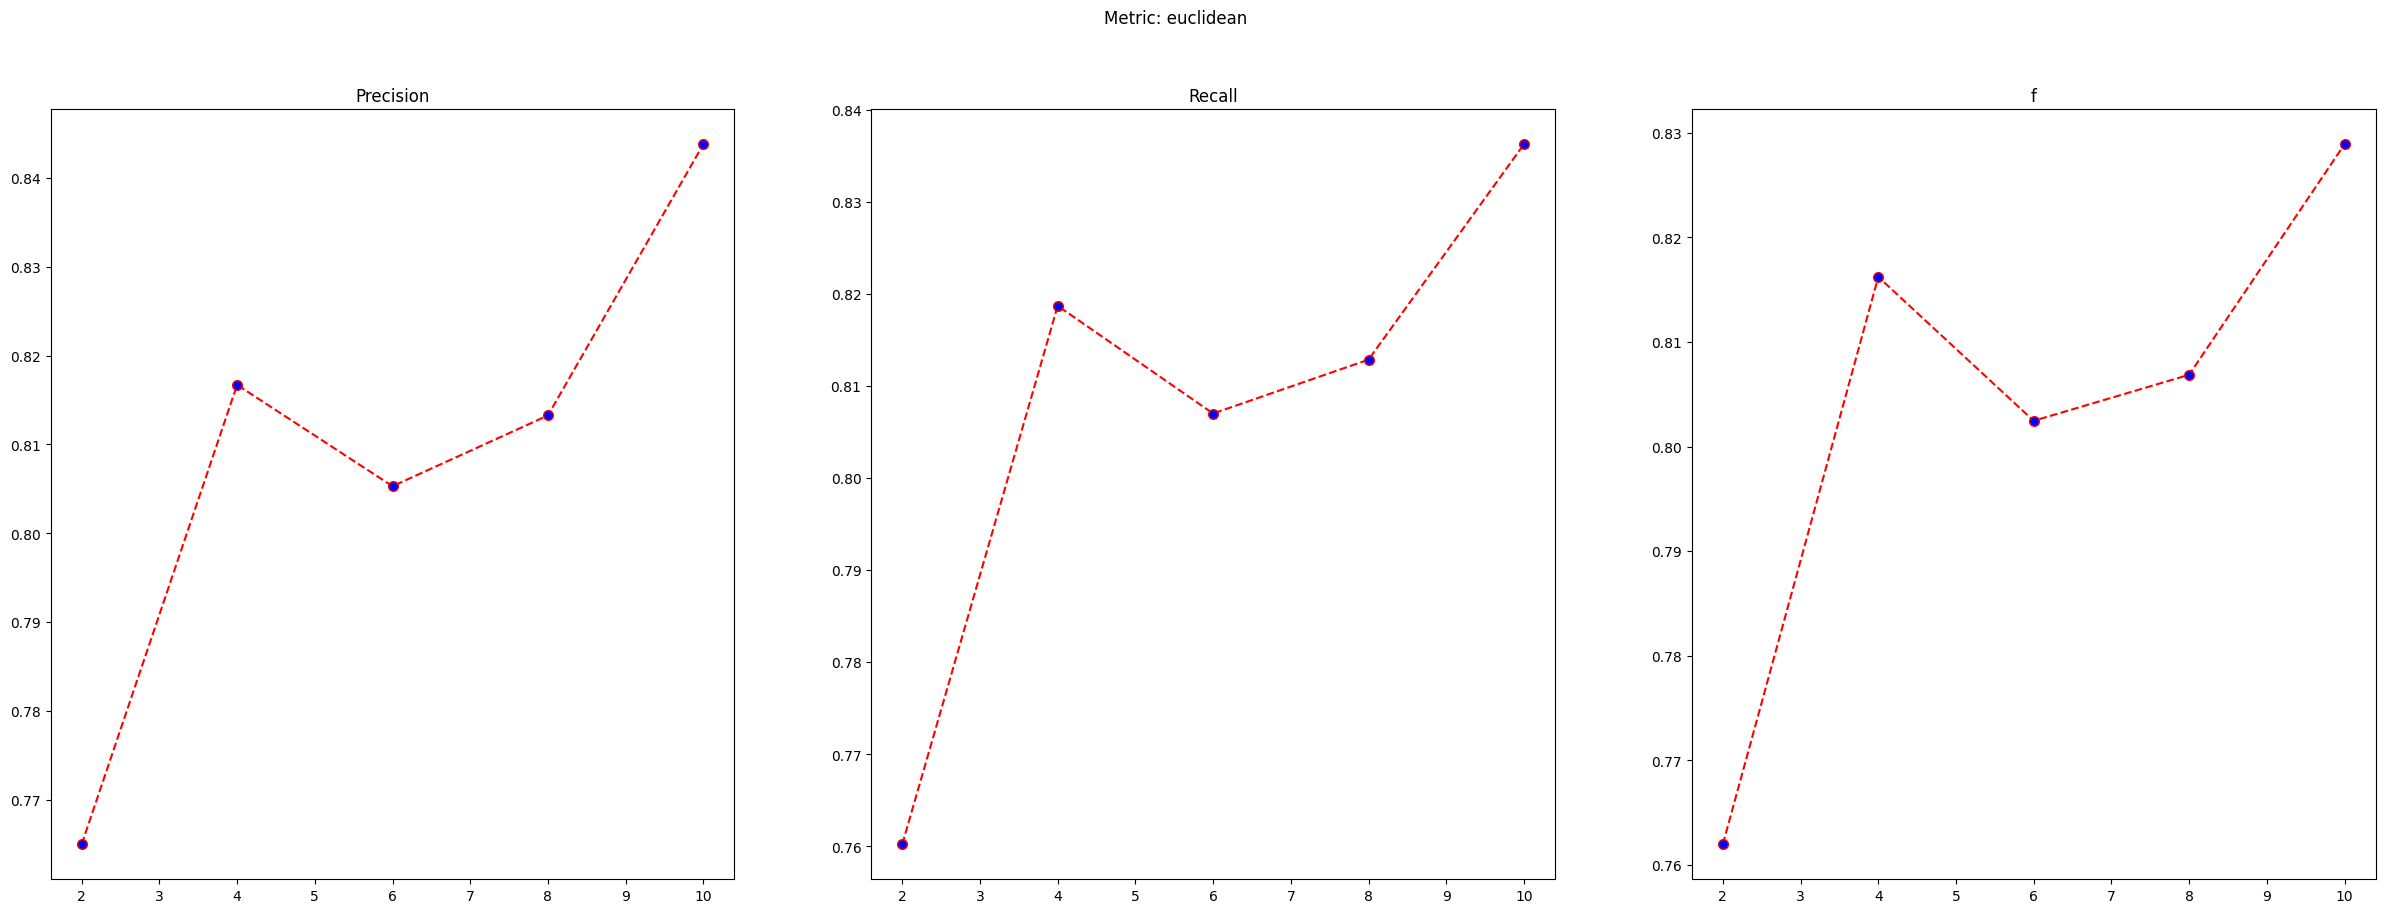

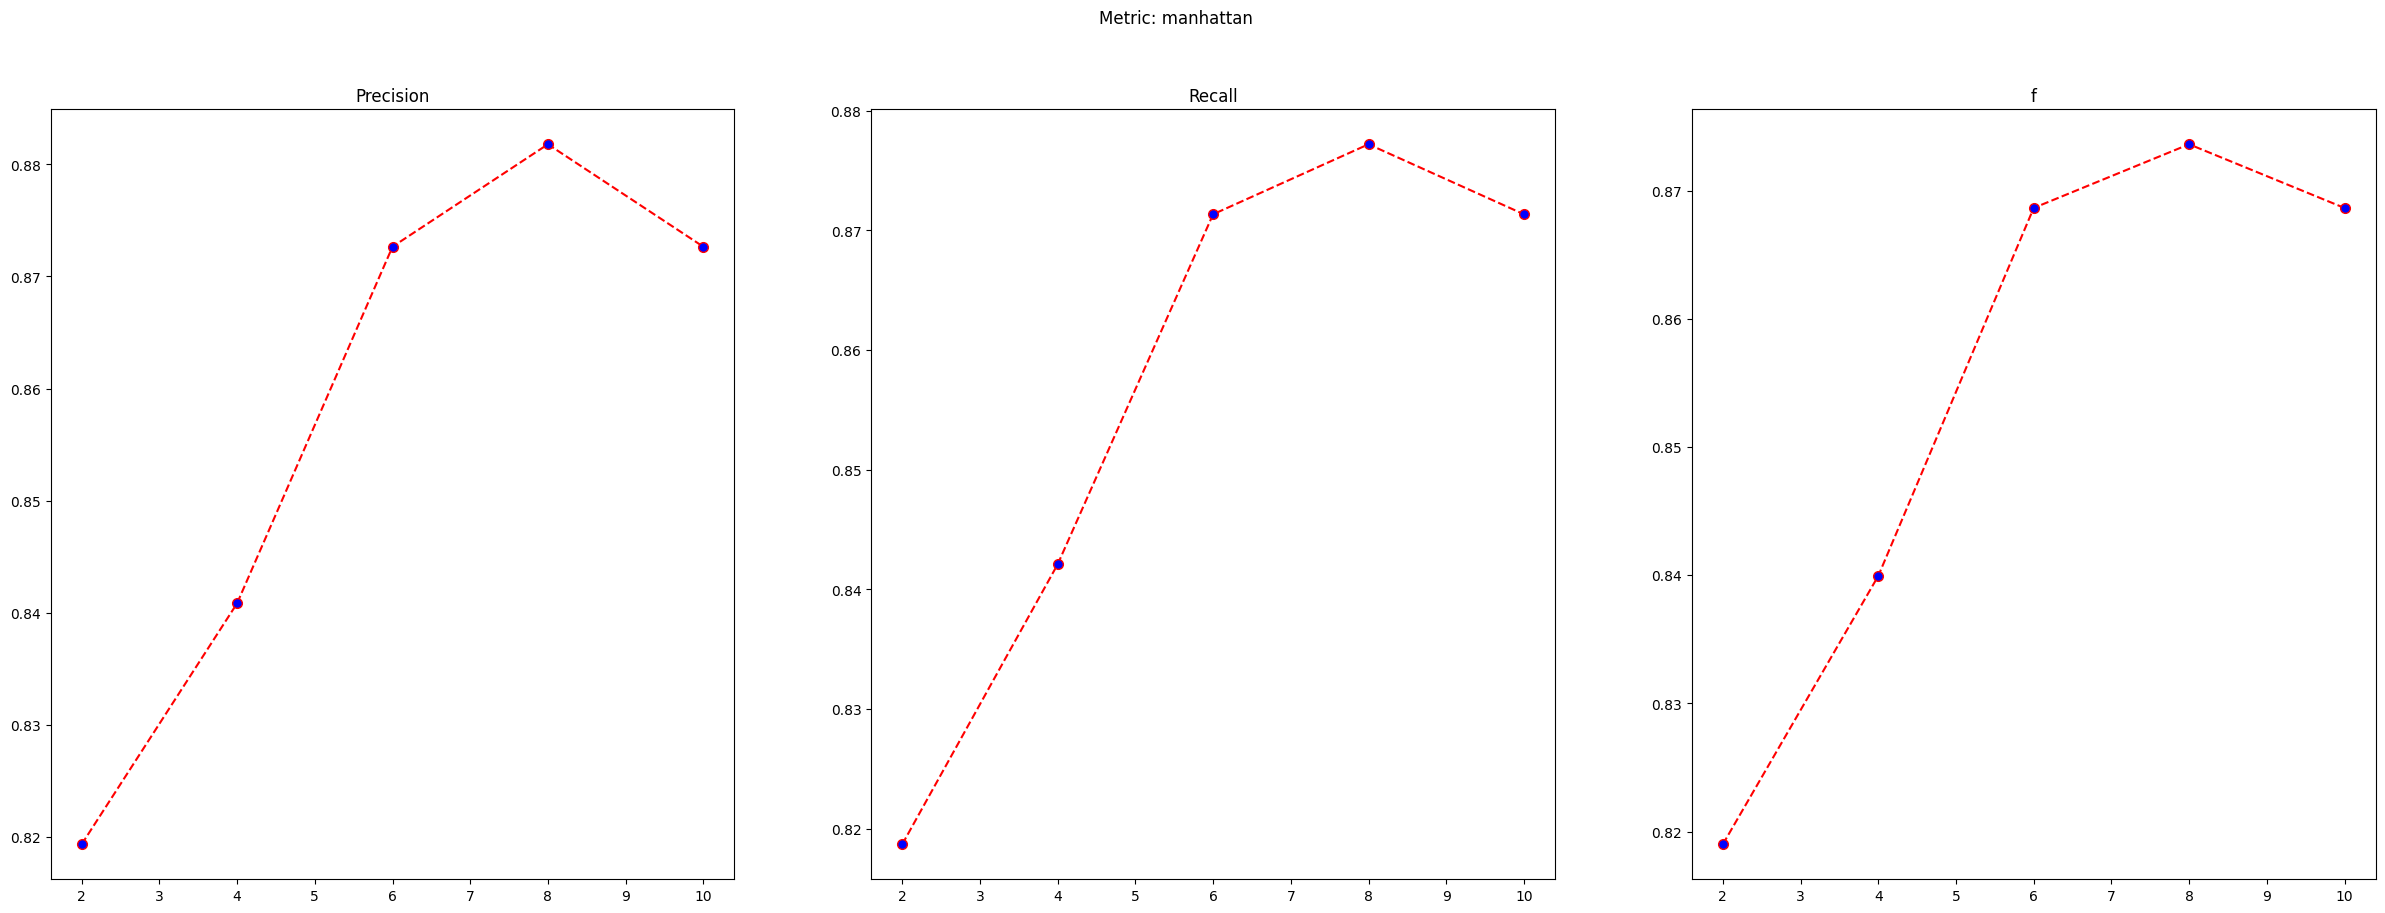

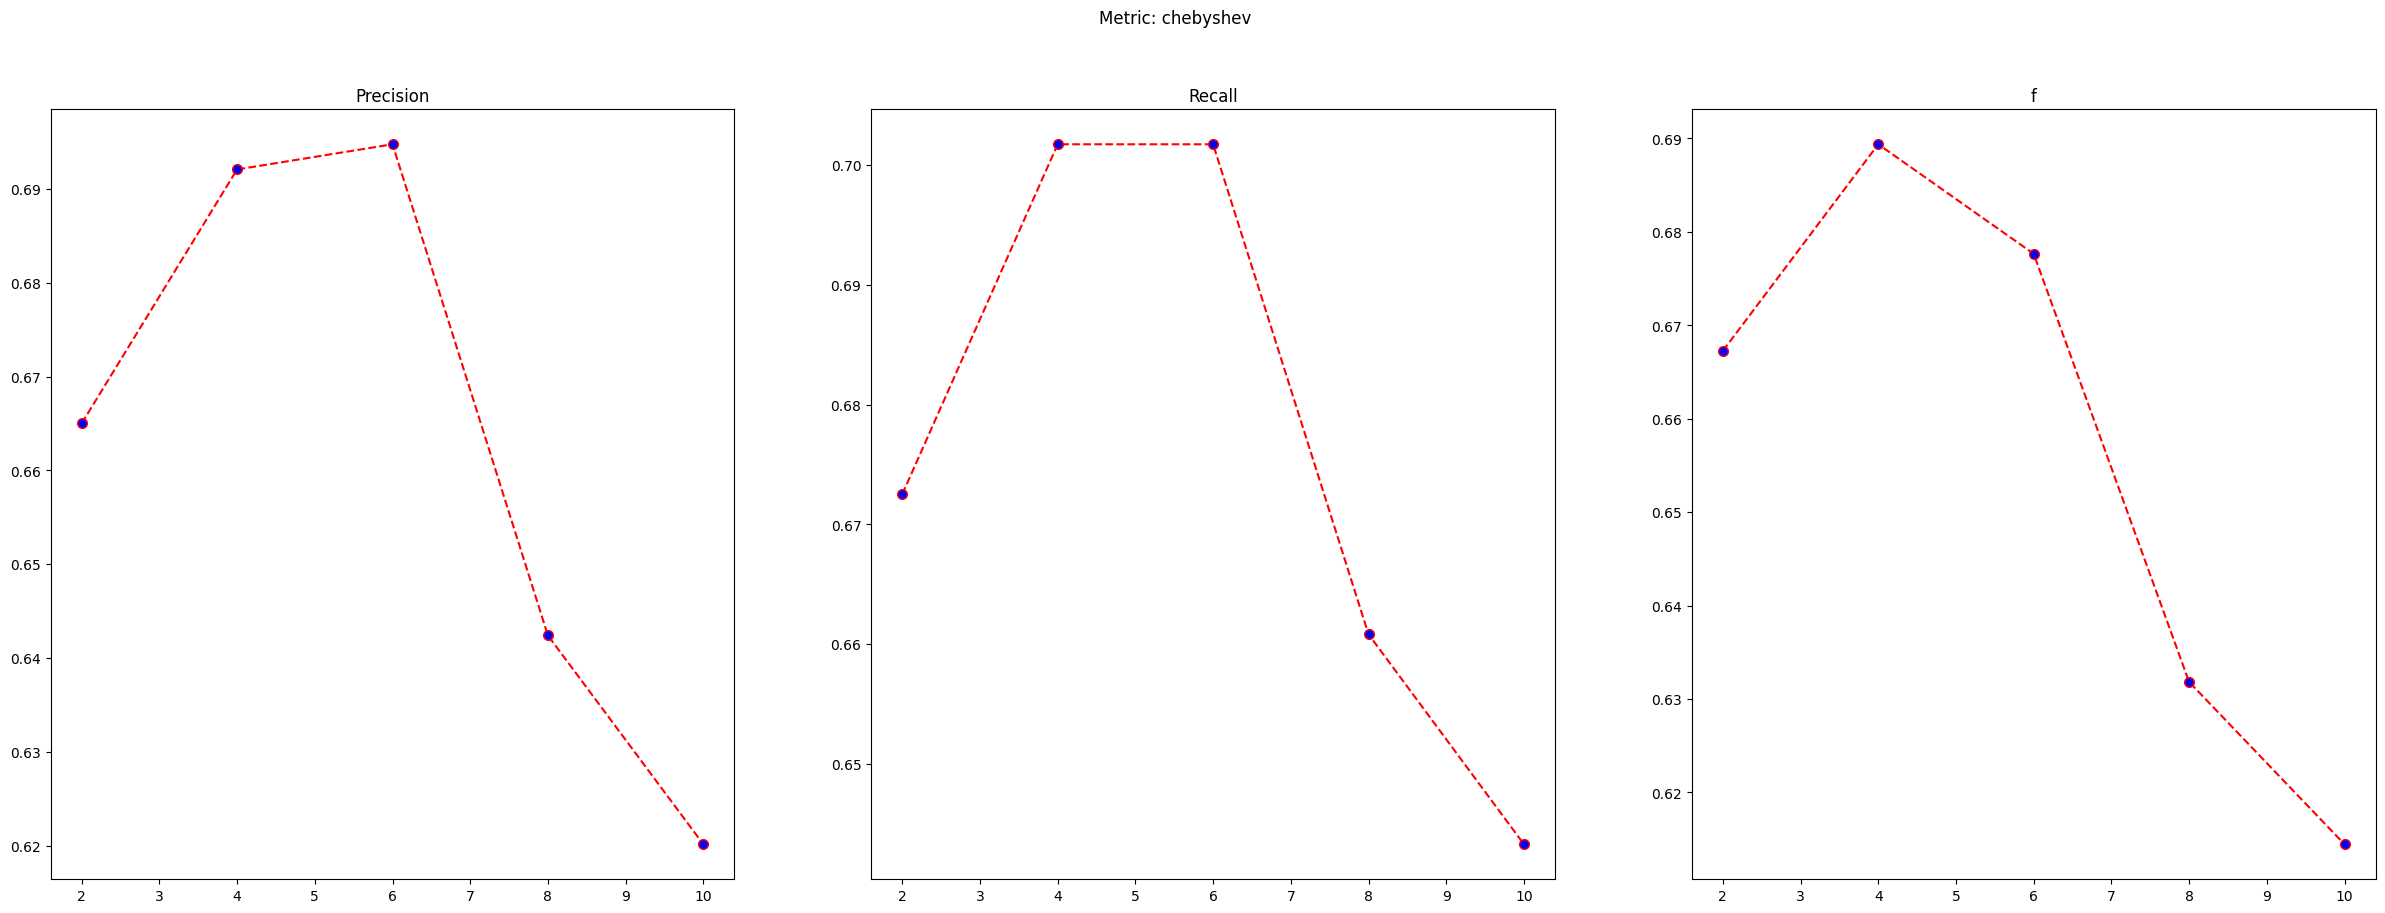

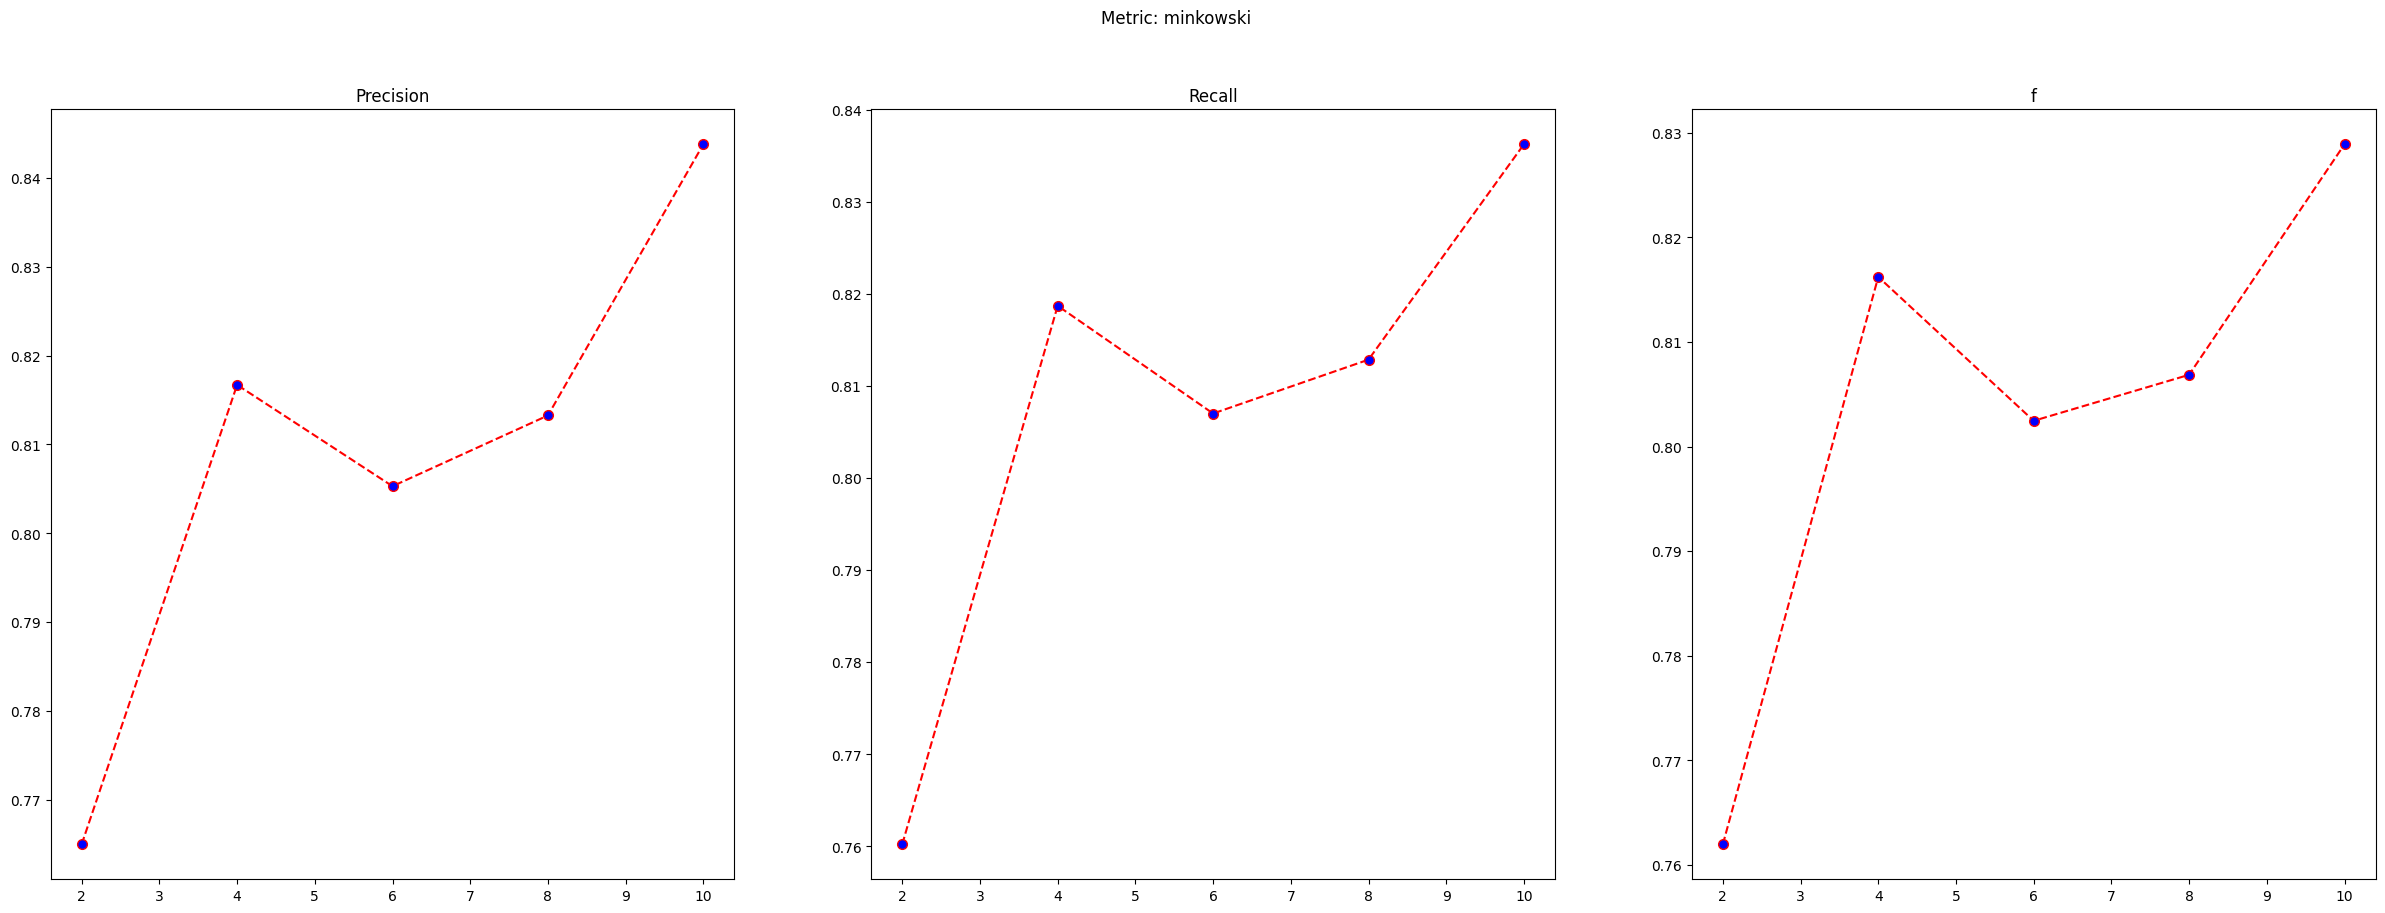

In [55]:
def doKNeightbors(m):
  precisionArr = []
  recallArr = []
  fArr = []

  neighborsRange = range(2, 12, 2)

  for i in neighborsRange:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
    knn.fit(xTraining, yTraining)
    predict = knn.predict(xTest).tolist()

    metricsData = precision_recall_fscore_support(yTest, predict, average='weighted')

    precisionArr.append(np.average(metricsData[0]))
    recallArr.append(np.average(metricsData[1]))
    fArr.append(np.average(metricsData[2]))

  fig, ax = plt.subplots(1, 3, figsize=(30, 10))
  ax[0].plot(neighborsRange, precisionArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
  ax[1].plot(neighborsRange, recallArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
  ax[2].plot(neighborsRange, fArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)

  ax[0].set_title("Precision")
  ax[1].set_title("Recall")
  ax[2].set_title("f")

  fig.suptitle("Metric: " + m)

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
  doKNeightbors(m)

plt.show()

### 2.3. Confusion Matrix

In [56]:
typeV = df["diagnosis"].unique()
typeV.sort()
print(typeV)

[0 1]


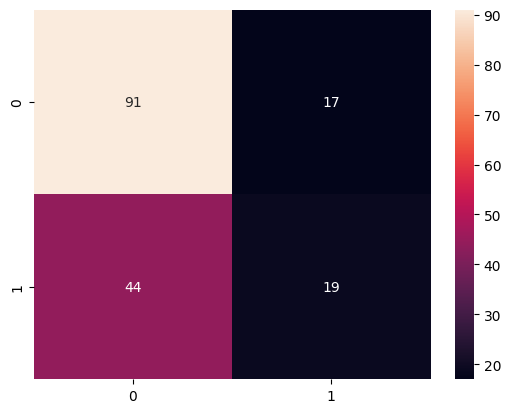

In [57]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='chebyshev')
knn.fit(xTraining, yTraining)
predictions = knn.predict(xTest).tolist()

confusionMatrix = confusion_matrix(yTest, predictions)
cm = pd.DataFrame(confusionMatrix, columns=typeV, index = typeV)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### 2.4. Метрики

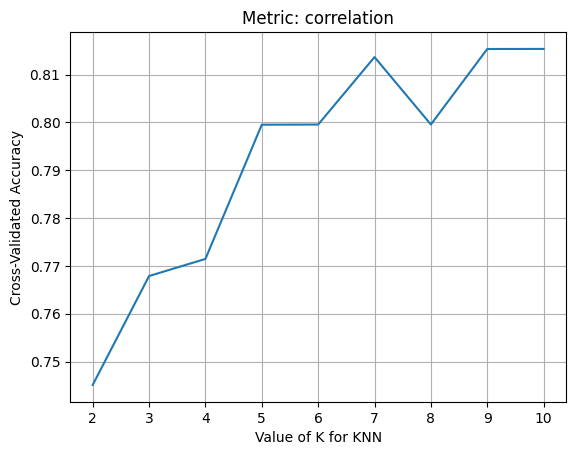

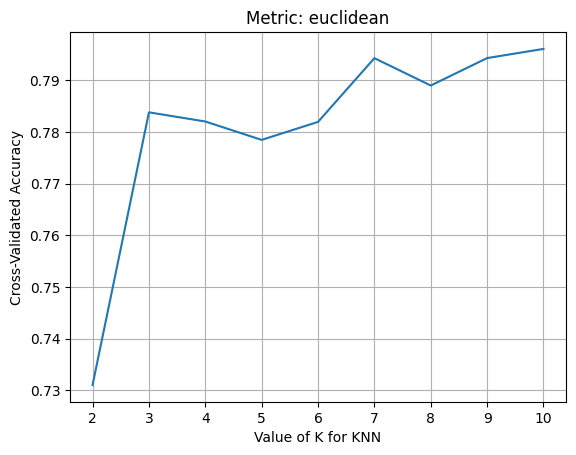

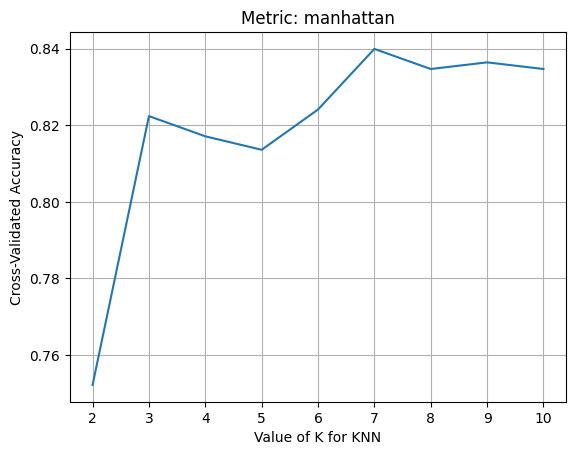

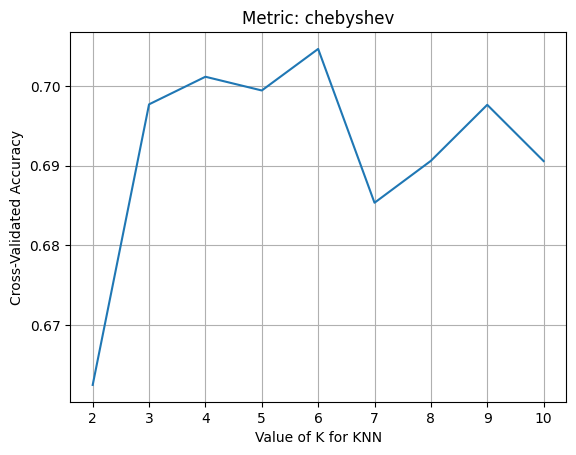

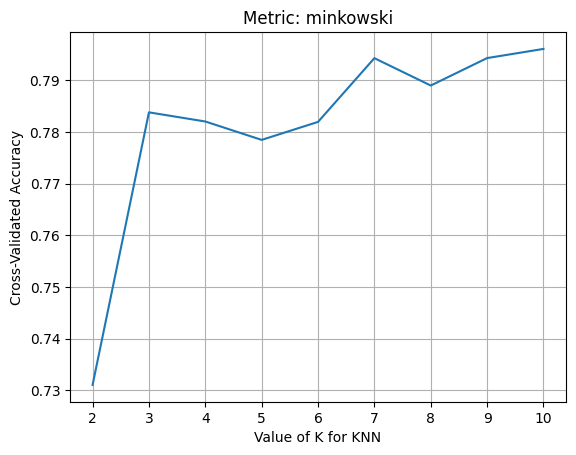

In [58]:
def doKNeightbors(m):
  kScores = []

  neighborsRange = range(2, 11)

  for i in neighborsRange:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
    kScores.append(cross_val_score(knn, df, y, cv=5, scoring='accuracy').mean())

  plt.plot(neighborsRange, kScores)
  plt.title("Metric: " + m)
  plt.xlabel('Value of K for KNN')
  plt.ylabel('Cross-Validated Accuracy')
  plt.grid()
  plt.show()

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
  doKNeightbors(m)

### 2.5. Деревья принятия решений

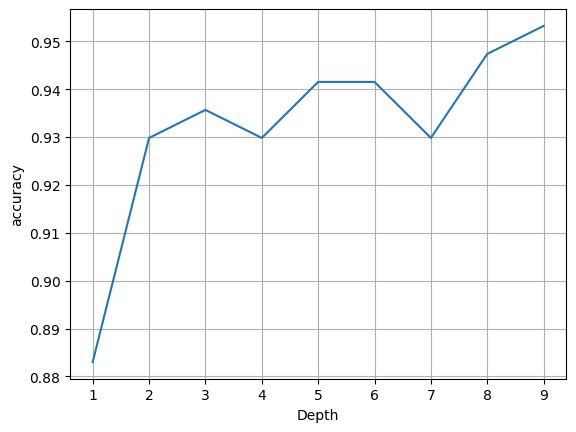

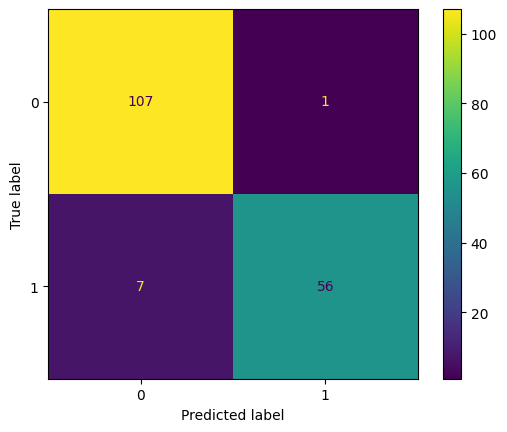

Max deep:  9
f1:  0.952678994784258
Recall:  0.9532163742690059
Precision:  0.9547553093259465


In [59]:
pltx = []
plty = []

for depth in range(1, 10):
    model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
    predictions = model.predict(xTest)
    plty.append(accuracy_score(yTest, predictions))
    pltx.append(depth)

plt.plot(pltx, plty)
plt.xlabel('Depth')
plt.ylabel('accuracy')
plt.grid()
plt.show()

maxDepth = pltx[plty.index(max(plty))]
# pl = plot_confusion_matrix(model, xTest, yTest)
ConfusionMatrixDisplay.from_estimator(estimator=model, X=xTest, y=yTest)
plt.show()

print("Max deep: ", maxDepth)
print("f1: ", f1_score(yTest, predictions, average='weighted'))
print("Recall: ", recall_score(yTest, predictions, average='weighted'))
print("Precision: ", precision_score(yTest, predictions, average='weighted'))

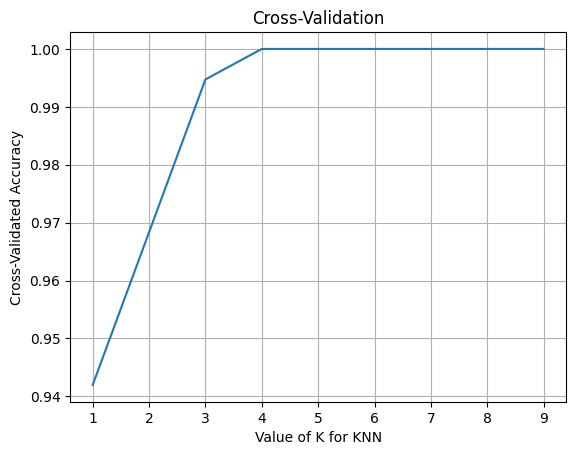

In [60]:
kScores = []
depthRange = range(1, 10)
for depth in depthRange:
  model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
  kScores.append(cross_val_score(model, df, y, cv=5, scoring='accuracy').mean())

plt.plot(depthRange, kScores)
plt.title("Cross-Validation")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()